In [1]:
import json

# Import local functions
from general_functions import *

In [2]:
# Import data
# Access aws credentials from json file
with open("aws_credentials.json", 'r') as file:
    aws_creds_json = json.load(file)
# Specify s3 bucket
bucket = "fs-reghub-news-analysis"

# Connect to aws and dowload the files
aws = awsOps(aws_creds_json)
df = aws.get_df(bucket=bucket, file="data_rule_labels_updated_rough_cleaning.csv")
df_categories = aws.get_df(bucket=bucket, file="categories.csv")

In [3]:
df

,Unnamed: 0,_id,_index,_score,_type,concepts,found_dates,id,internal_links,keywords,...,news_title,news_topic,news_type,references,sentiment_label,sentiment_score,source_country,source_name,source_type,rule_labels_comb
0,0,fin1023Preslofreshbuy917302,2021_reghub_new,NaN,_doc,NaN,[],fin1023Preslofreshbuy917302,[],NaN,...,HelloFresh Buy von Joh. Berenberg Gossler & Co...,"[{""description"":""Berenberg Bank"",""relevance"":4...",Press releases,[],NaN,0.0,Global,finanzen.at,Information Provider,['market']
1,1,finichtenStoceaaufbuy322htm,2021_reghub_new,NaN,_doc,NaN,[],finichtenStoceaaufbuy322htm,[],NaN,...,BERENBERG stuft Nordea auf 'Buy' Finanznachri...,"[{""description"":""Berenberg Bank"",""relevance"":6...",Stock Analysis,[],NaN,0.0,Global,finanznachrichten.de,Information Provider,[]
2,2,fin1023Pressanofibuy917301,2021_reghub_new,NaN,_doc,NaN,[],fin1023Pressanofibuy917301,[],NaN,...,Sanofi Buy von Joh. Berenberg Gossler & Co. KG...,"[{""description"":""Berenberg Bank"",""relevance"":4...",Press releases,[],NaN,0.0,Global,finanzen.ch,Information Provider,[]
3,3,fin02023Presnbergbank917304,2021_reghub_new,NaN,_doc,NaN,[],fin02023Presnbergbank917304,[],NaN,...,Sartorius vz Buy (Joh. Berenberg Gossler & Co....,"[{""description"":""Berenberg Bank"",""relevance"":4...",Press releases,[],NaN,0.0,Global,finanzen.net,Information Provider,['guidelines']
4,4,walOnlineStocgstuftsanofibuy,2021_reghub_new,NaN,_doc,NaN,[],walOnlineStocgstuftsanofibuy,[],NaN,...,BERENBERG stuft SANOFI auf 'Buy' 30.10.2023 ...,"[{""description"":""Berenberg Bank"",""relevance"":6...",Stock Analysis,[],NaN,0.0,Global,wallstreet-online.de,Information Provider,['guidelines']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496,14603,EurchosPres9fa0e44b60enhtml,2021_reghub_new,NaN,_doc,NaN,[],EurchosPres9fa0e44b60enhtml,[],NaN,...,Andrea Enria: Interview with Les Échos,"[{""description"":""Compliance"",""relevance"":7,""co...",Press releases,[],NaN,0.0,European Union (EU),European Central Bank (ECB),Central bank,"['legal', 'statements', 'guidelines']"
14497,14604,UBSWillPresllhtmlcaasIDRSS,2021_reghub_new,NaN,_doc,NaN,[],UBSWillPresllhtmlcaasIDRSS,[],NaN,...,Das FintechPortfolio von UBS investiert in die...,"[{""description"":""Digital Transformation"",""rele...",Press releases,[],NaN,0.0,Global,UBS Media Releases,Financial Service Provider,['reports']
14498,14605,invrankenPresnd26mrdfranken,2021_reghub_new,NaN,_doc,NaN,[],invrankenPresnd26mrdfranken,[],NaN,...,SNB erwartet für 2021 Jahresgewinn von rund 26...,"[{""description"":""Controlling"",""relevance"":33,""...",Press releases,[],NaN,0.0,Switzerland,investrends,Information provider,"['legal', 'reports', 'guidelines']"
14499,14606,CoirawalsPrestomerswithdrawals,2021_reghub_new,NaN,_doc,NaN,[],CoirawalsPrestomerswithdrawals,[],NaN,...,Hong Kongbased Coinsuper allegedly blocks cust...,"[{""description"":""Daytrading"",""relevance"":49,""c...",Social Media,[],NaN,0.0,Global,Cointelegraph,Information provider,"['sanctions', 'reports', 'statements', 'guidel..."


In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14501 entries, 0 to 14500
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         14501 non-null  int64  
 1   _id                14501 non-null  object 
 2   _index             14501 non-null  object 
 3   _score             11 non-null     object 
 4   _type              14491 non-null  object 
 5   concepts           2254 non-null   object 
 6   found_dates        13779 non-null  object 
 7   id                 14501 non-null  object 
 8   internal_links     13731 non-null  object 
 9   keywords           2360 non-null   object 
 10  language           14492 non-null  object 
 11  news_author        1979 non-null   object 
 12  news_content       14501 non-null  object 
 13  news_date          14490 non-null  object 
 14  news_label         238 non-null    object 
 15  news_last_updated  11 non-null     object 
 16  news_legalinforce  144

In [6]:
df.describe()

,Unnamed: 0,news_rank,sentiment_score
count,14501.000000,14490.000000,14488.000000
mean,7293.535480,1.602899,18316.606985
std,4213.730597,7.397628,185054.209279
min,0.000000,0.000000,-998439.000000
25%,3655.000000,0.000000,0.000000
50%,7294.000000,0.000000,0.000000
75%,10930.000000,0.000000,0.000000
max,14607.000000,160.000000,999864.000000


## Data Cleaning

In [7]:
# Count the number of empty values in 'new_content'
empty_count = df['news_content'].isna().sum()

print(f"Number of empty values in 'news_content': {empty_count}")

Number of empty values in 'news_content': 0


In [8]:
# Create a new DataFrame without rows where 'new_content' is empty
df = df.dropna(subset=['news_content'])


In [9]:
# Assuming 'concepts' is the column containing the concepts
keyword_to_remove = "market microstructure"
df = df[~df['concepts'].str.contains(keyword_to_remove, case=False, na=False)]

## Preliminary EDA

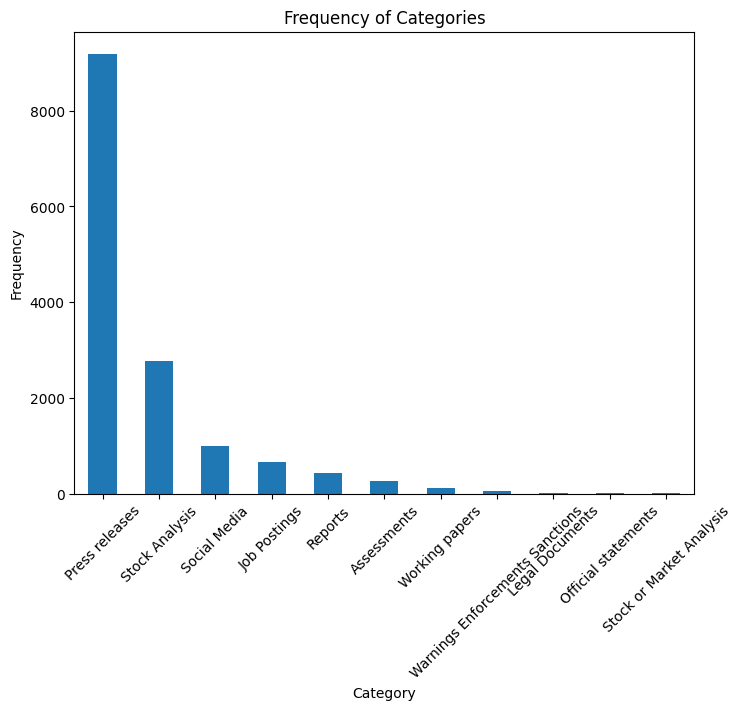

In [10]:
# Calculate the frequency of each category
category_counts = df['news_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

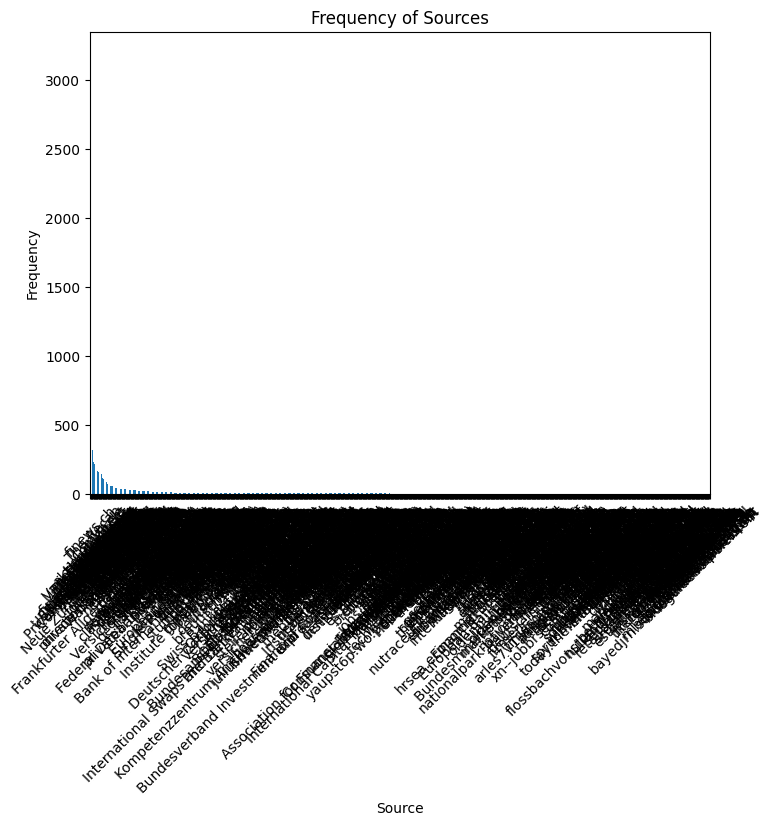

In [11]:
# Calculate the frequency of each category
source_counts = df['source_name'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
source_counts.plot(kind='bar')
plt.title('Frequency of Sources')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

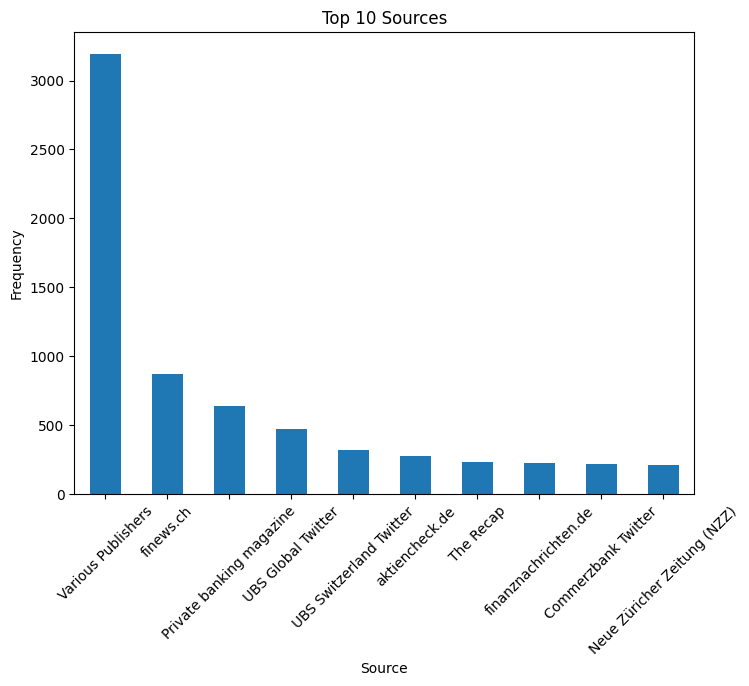

In [12]:
# Calculate the frequency of each category
source_counts = df['source_name'].value_counts()

# Select the top 10 sources
top_sources = source_counts.head(10)

# Create a bar chart for the top 10 sources
plt.figure(figsize=(8, 6))
top_sources.plot(kind='bar')
plt.title('Top 10 Sources')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [13]:
print(source_counts.head(20))

source_name
Various Publishers             3191
finews.ch                       875
Private banking magazine        640
UBS Global Twitter              470
UBS Switzerland Twitter         320
aktiencheck.de                  278
The Recap                       234
finanznachrichten.de            225
Commerzbank Twitter             216
Neue Züricher Zeitung (NZZ)     208
Finance Magazin                 196
marketscreener.com              194
defenseworld.net                169
Handelsblatt                    168
Commerzbank AG News             163
beststocks.com                  161
UBS Media Releases              158
Comdirect                       154
Berenberg Bank                  151
Think Advisor                   146
Name: count, dtype: int64


<Axes: >

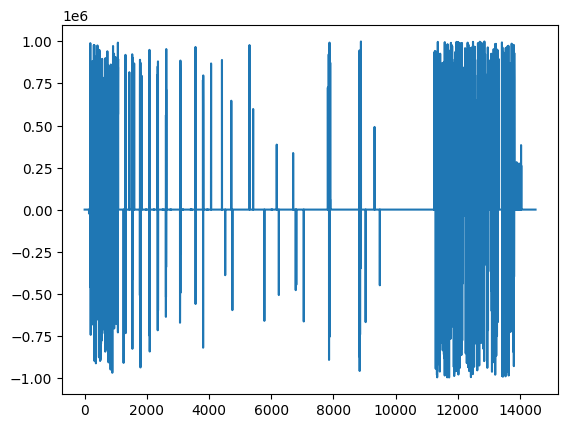

In [14]:
df["sentiment_score"].plot()

In [15]:
print("Sentiment score equals to zero " + str((df['sentiment_score'
                                        ] == 0).sum()) + " times.")
print("General dataset is " + str(len(df)) + " entries long.")

Sentiment score equals to zero 13472 times.
General dataset is 14500 entries long.


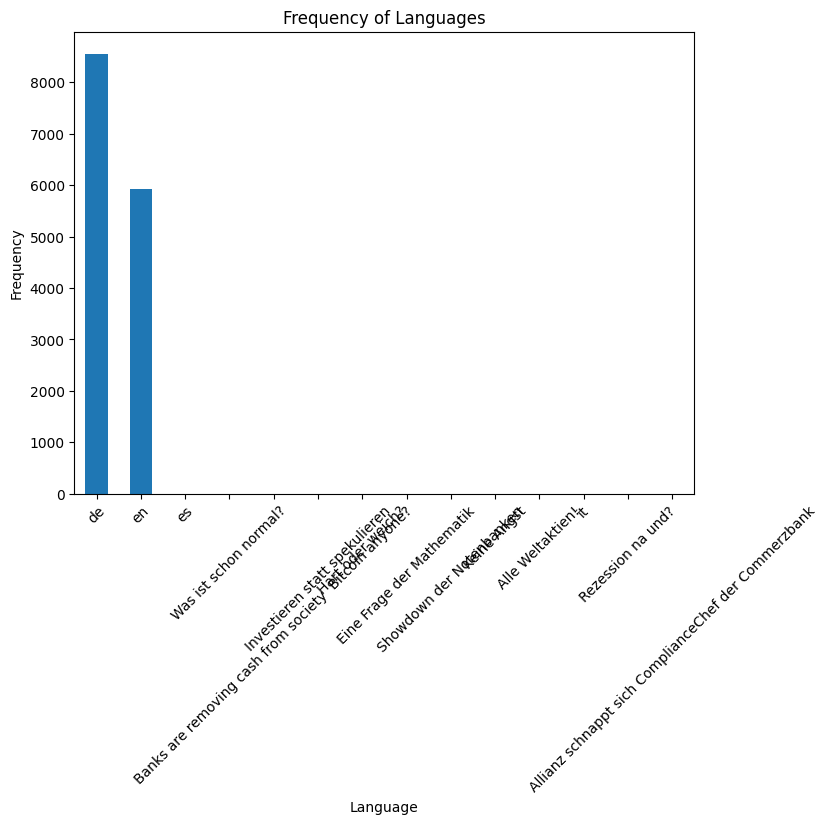

In [16]:
# Calculate the frequency of each category
language_counts = df['language'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
language_counts.plot(kind='bar')
plt.title('Frequency of Languages')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

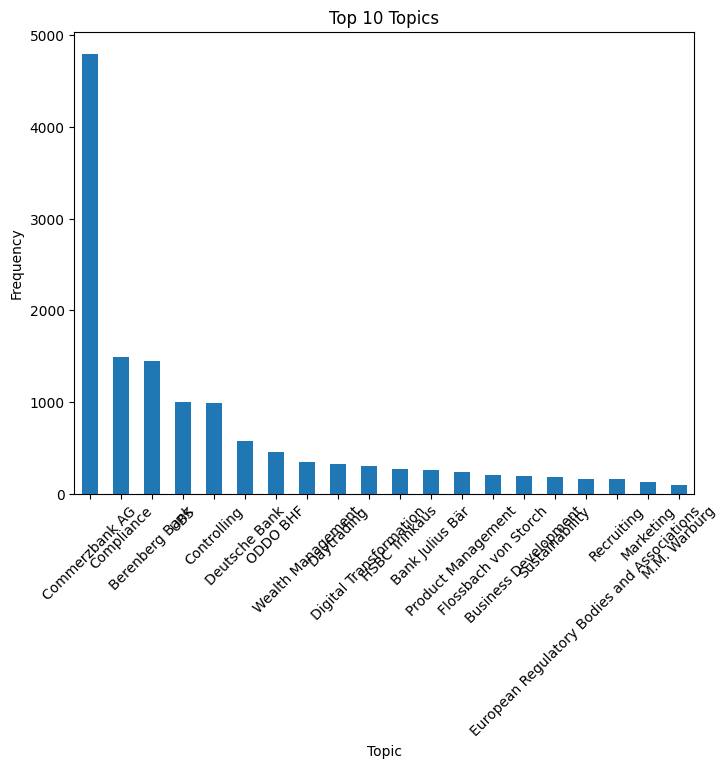

In [17]:
def extract_description(row):
    try:
        if isinstance(row, str):
            data = json.loads(row)
            return data[0]['description']
        else:
            return None
    except (json.JSONDecodeError, IndexError):
        return None

df['news_topic_formatted'] = df['news_topic'].apply(extract_description)

# Calculate the frequency of each topic
topic_counts = df['news_topic_formatted'].value_counts()

# Select the top 20 topics
top_topics = topic_counts.head(20)

# Create a bar chart for the top 20 topics
plt.figure(figsize=(8, 6))
top_topics.plot(kind='bar')
plt.title('Top 10 Topics')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [18]:
print(topic_counts.head(20))

news_topic_formatted
Commerzbank AG                                 4799
Compliance                                     1488
Berenberg Bank                                 1450
UBS                                             998
Controlling                                     990
Deutsche Bank                                   581
ODDO BHF                                        461
Wealth Management                               344
Daytrading                                      326
Digital Transformation                          303
HSBC Trinkaus                                   271
Bank Julius Bär                                 262
Product Management                              237
Flossbach von Storch                            204
Business Development                            192
Sustainability                                  179
European Regulatory Bodies and Associations     166
Recruiting                                      156
Marketing                                  

C:\Users\xiang\AppData\Local\Temp\ipykernel_2856\796330820.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['news_date'] = pd.to_datetime(df['news_date'])


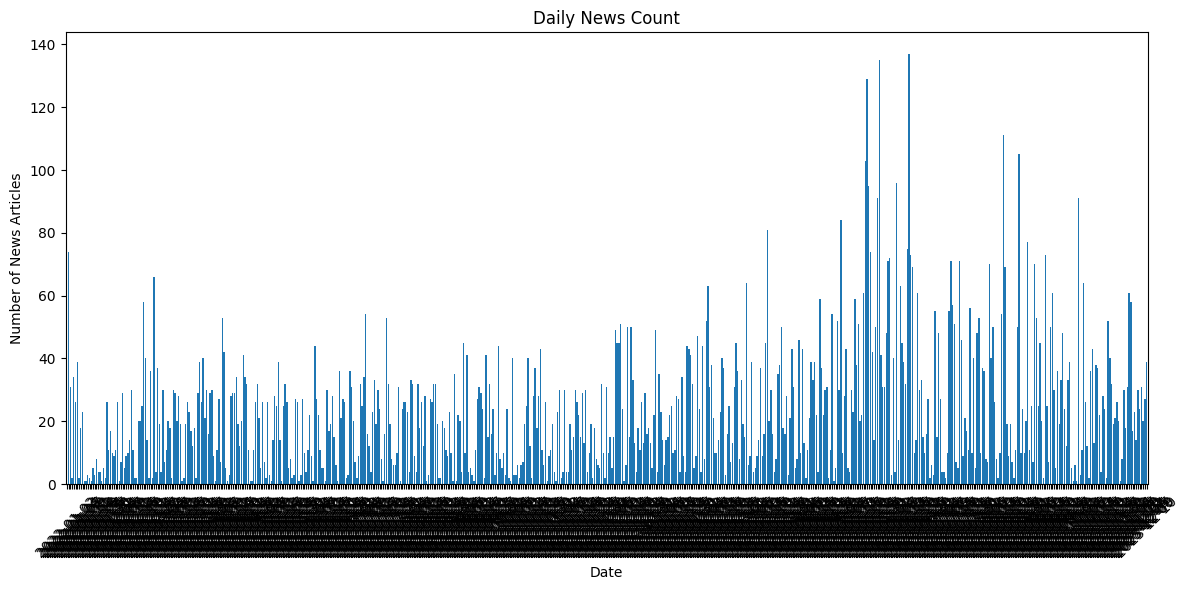

In [19]:
# Convert the date column to a datetime type
df['news_date'] = pd.to_datetime(df['news_date'])

# Extract the date component (day) and count the number of news articles per day
daily_news_count = df['news_date'].dt.date.value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
daily_news_count.plot(kind='bar', width=0.8)
plt.title('Daily News Count')
plt.xlabel('Date')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

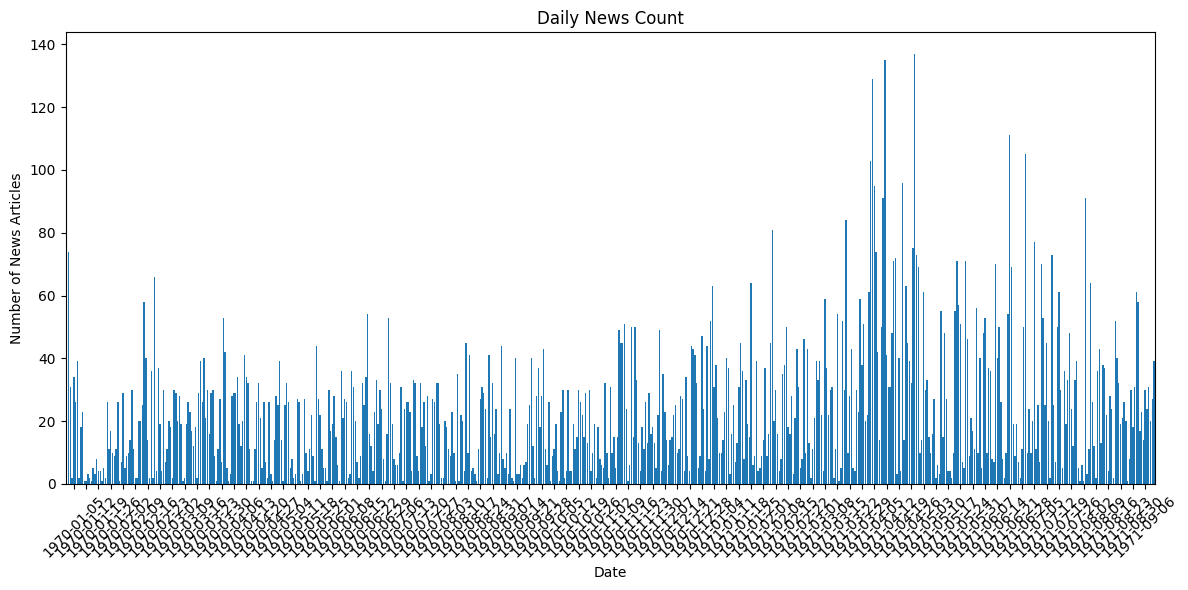

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Extract the date component (day) and count the number of news articles per day
daily_news_count = df['news_date'].dt.date.value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
daily_news_count.plot(kind='bar', width=0.8)

# Set the major locator on Mondays
mondays = mdates.WeekdayLocator(mdates.MONDAY)
plt.gca().xaxis.set_major_locator(mondays)

# Formatting for date on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Daily News Count')
plt.xlabel('Date')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Text Statistics

<Axes: >

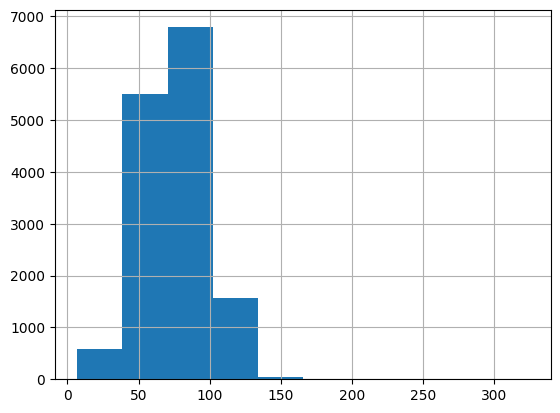

In [21]:
# Number of characters in each headlines
df['news_title'].str.len().hist()

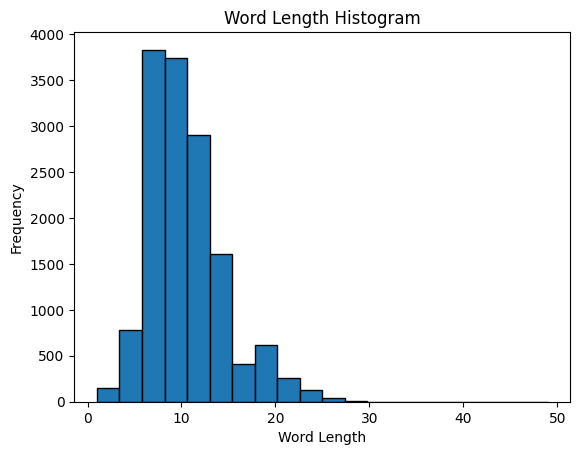

In [22]:
def plot_word_number_histogram(text):
    # Exclude NaN values
    text = text.dropna()

    # Calculate the length of each word and plot the histogram
    word_lengths = text.str.split().map(lambda x: len(x))
    plt.hist(word_lengths, bins=20, edgecolor='black')
    plt.title('Word Length Histogram')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.show()

# Assuming df is your DataFrame
plot_word_number_histogram(df['news_title'])

In [23]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
nltk.download('stopwords')

# Define stopwords for English and German
stop_en = set(stopwords.words('english'))
stop_de = set(stopwords.words('german'))

# Filter DataFrame for English and German content
df_en = df[df['language'] == 'en']
df_de = df[df['language'] == 'de']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Function to process the corpus, remove stopwords, and create a bar plot
def process_and_plot(df, stop, language):
    corpus = [word for text in df['news_content'].str.split() for word in text]
    
    # Remove stopwords
    corpus = [word for word in corpus if word not in stop]
    
    # Count the occurrences of words
    counter = Counter(corpus)
    
    # Get the most common words
    most_common = counter.most_common()[:40]

    # Separate x and y values for plotting
    x, y = zip(*most_common)

    # Create a bar plot using Seaborn
    sns.barplot(x=y, y=x)
    
    # Add labels and title
    plt.xlabel('Word Count')
    plt.ylabel('Words')
    plt.title(f'Most Common Words in {language} News Content')
    
    # Show the plot
    plt.show()

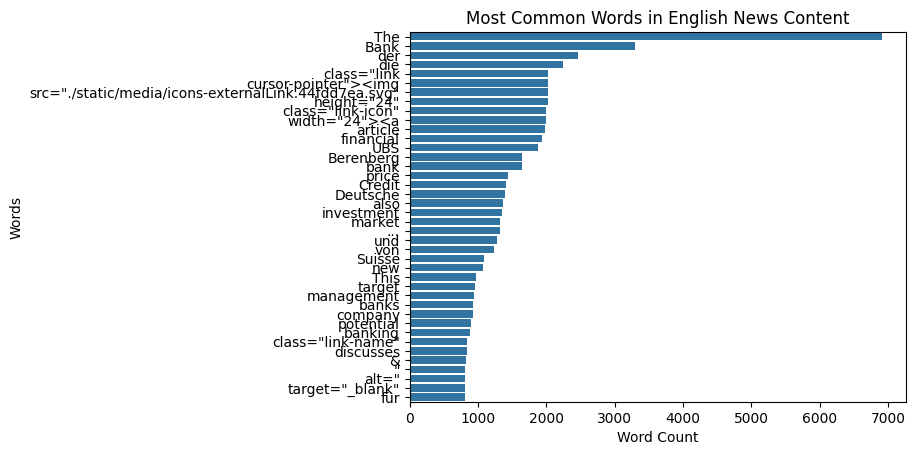

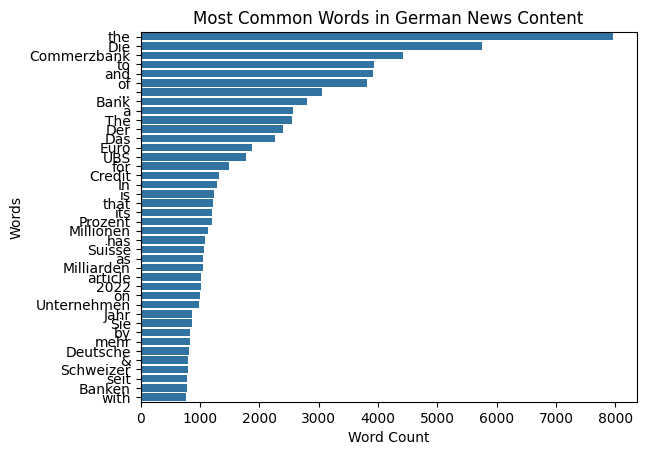

In [26]:
# Process and plot for English content
process_and_plot(df_en, stop_en, 'English')

# Process and plot for German content
process_and_plot(df_de, stop_de, 'German')

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
import pyLDAvis
import pyLDAvis.gensim
from collections import defaultdict

In [28]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define stopwords for English and German
stop_en = set(stopwords.words('english'))
stop_de = set(stopwords.words('german'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
def get_lda_objects(text, language='english'):
    stop = stop_en if language == 'english' else stop_de

    def _preprocess_text(text):
        corpus = []
        lem = WordNetLemmatizer()
        for news in text:
            # Check for NaN values
            if pd.notna(news):
                words = [w for w in word_tokenize(news) if (w not in stop)]
                words = [lem.lemmatize(w) for w in words if len(w) > 2]
                corpus.append(words)
        return corpus

    corpus = _preprocess_text(text)

    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    lda_model = gensim.models.LdaMulticore(bow_corpus,
                                           num_topics=6,
                                           id2word=dic,
                                           passes=10,
                                           workers=2)

    return lda_model, bow_corpus, dic

In [30]:
def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [31]:
title_en = df_en['news_title'].tolist()
title_de = df_de['news_title'].tolist()

In [32]:
lda_model_en, bow_corpus_en, dic_en = get_lda_objects(title_en, language='english')
vis_en_t = plot_lda_vis(lda_model_en, bow_corpus_en, dic_en)

lda_model_de, bow_corpus_de, dic_de = get_lda_objects(title_de, language='german')
vis_de_t = plot_lda_vis(lda_model_de, bow_corpus_de, dic_de)

In [33]:
vis_en_t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.258133  0.041955       1        1  21.214041
4     -0.067941  0.108646       2        1  19.180029
3     -0.094711  0.118781       3        1  15.895696
0     -0.008264 -0.075561       4        1  15.128608
5     -0.056203 -0.046275       5        1  14.506070
1     -0.031015 -0.147546       6        1  14.075556, topic_info=           Term        Freq       Total Category  logprob  loglift
1          Bank  577.000000  577.000000  Default  30.0000  30.0000
2     Berenberg  559.000000  559.000000  Default  29.0000  29.0000
155         BHF  209.000000  209.000000  Default  28.0000  28.0000
1496        LON  167.000000  167.000000  Default  27.0000  27.0000
252       Price  168.000000  168.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1412      raise   15.631725   42.401261   Topic6  -6.1883   0.9629
13          auf   18.313723  185.233168   Topic6  -6.0299  -0.3532
8           von   16.386736   96.208115   Topic6  -6.1411   0.1907
165       Group   17.256514  204.658093   Topic6  -6.0894  -0.5124
507         und   15.089783  125.555378   Topic6  -6.2235  -0.1580

[403 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
9         3  0.194793   'Buy
9         4  0.206968   'Buy
9         5  0.584379   'Buy
1012      3  0.103200  'Hold
1012      4  0.257999  'Hold
...     ...       ...    ...
3312      2  0.385330   year
3312      3  0.323677   year
3312      4  0.092479   year
3312      5  0.169545   year
3312      6  0.015413   year

[708 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 6, 2])

In [34]:
vis_de_t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.199749 -0.034551       1        1  28.116730
4      0.105853  0.083647       2        1  16.692377
5     -0.161923  0.019232       3        1  15.937820
2     -0.043532 -0.191166       4        1  13.709242
1     -0.043574 -0.016243       5        1  13.167616
0     -0.056572  0.139082       6        1  12.376214, topic_info=             Term         Freq        Total Category  logprob  loglift
32    Commerzbank  2030.000000  2030.000000  Default  30.0000  30.0000
350      Deutsche   488.000000   488.000000  Default  29.0000  29.0000
93            ...  1232.000000  1232.000000  Default  28.0000  28.0000
286          Bank   631.000000   631.000000  Default  27.0000  27.0000
162           UBS   498.000000   498.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
63            Die    41.799020   344.168830   Topic6  -5.2203  -0.0189
495     Schweizer    26.569511    91.803699   Topic6  -5.6734   0.8495
32    Commerzbank    53.246714  2030.615508   Topic6  -4.9782  -1.5518
104         Börse    33.541909   340.057281   Topic6  -5.4403  -0.2269
217  Handelsblatt    22.187764   138.677846   Topic6  -5.8536   0.2568

[377 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5304      1  0.960500     'Hold
5196      1  0.982568  'Neutral
7644      4  0.941314   'Sector
1380      5  0.966300       +++
93        1  0.122496       ...
...     ...       ...       ...
77        1  0.576002  Ölpreise
77        2  0.351459  Ölpreise
77        3  0.009763  Ölpreise
77        6  0.058576  Ölpreise
3011      2  0.982365    ändert

[601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 6, 3, 2, 1])

In [35]:
content_en = df_en['news_content'].tolist()
content_de = df_de['news_content'].tolist()

In [36]:
lda_model_en, bow_corpus_en, dic_en = get_lda_objects(content_en, language='english')
vis_en_c = plot_lda_vis(lda_model_en, bow_corpus_en, dic_en)

lda_model_de, bow_corpus_de, dic_de = get_lda_objects(content_de, language='german')
vis_de_c = plot_lda_vis(lda_model_de, bow_corpus_de, dic_de)

In [37]:
vis_en_c

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.107442  0.229777       1        1  21.980794
3      0.156644 -0.005702       2        1  21.689627
4      0.140462  0.042292       3        1  21.546051
5      0.146456 -0.053964       4        1  18.004566
2     -0.366265 -0.085635       5        1  10.274703
1      0.030145 -0.126768       6        1   6.504260, topic_info=                 Term         Freq        Total Category  logprob  loglift
1590           class=  4965.000000  4965.000000  Default  30.0000  30.0000
162               der  2218.000000  2218.000000  Default  29.0000  29.0000
163               die  1990.000000  1990.000000  Default  28.0000  28.0000
1607             http  2168.000000  2168.000000  Default  27.0000  27.0000
1593   cursor-pointer  1776.000000  1776.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
10279            Read    63.937389   131.286692   Topic6  -6.1360   2.0132
18                The   104.778760  5823.662072   Topic6  -5.6420  -1.2851
21            company    86.959190  2156.606448   Topic6  -5.8284  -0.4781
316          Deutsche    80.285472  1194.493384   Topic6  -5.9083   0.0328
11              stock    76.345823  1004.436038   Topic6  -5.9586   0.1558

[461 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
28268      6  0.954345     'Knock
531        1  0.125961        ...
531        2  0.012596        ...
531        3  0.113365        ...
531        4  0.236011        ...
...      ...       ...        ...
907        5  0.000897       year
907        6  0.044831       year
6887       5  0.986557    zufolge
11450      1  0.046235  Übernahme
11450      5  0.947814  Übernahme

[1078 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 6, 3, 2])

In [38]:
vis_de_c

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.329098  0.020465       1        1  34.534859
4     -0.074083 -0.046607       2        1  19.484819
1     -0.070983  0.093041       3        1  16.561905
0     -0.073392  0.061210       4        1  14.523465
2     -0.075771  0.086991       5        1  10.010488
3     -0.034869 -0.215099       6        1   4.884464, topic_info=             Term         Freq        Total Category  logprob  loglift
26            the  6494.000000  6494.000000  Default  30.0000  30.0000
1173          ...  3534.000000  3534.000000  Default  29.0000  29.0000
9             and  3238.000000  3238.000000  Default  28.0000  28.0000
31    Commerzbank  4965.000000  4965.000000  Default  27.0000  27.0000
35            The  2015.000000  2015.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1305       Global    33.684286   207.882246   Topic6  -6.4977   1.1992
2460   Management    38.027369   702.908014   Topic6  -6.3764   0.1022
1936  Nachrichten    35.086293   532.320080   Topic6  -6.4569   0.2997
1071          Das    38.212993  2265.481815   Topic6  -6.3715  -1.0633
1655       Kunden    33.134253   545.474239   Topic6  -6.5142   0.2180

[446 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
22170      6  0.972736  'headerisloaded
1173       1  0.002546              ...
1173       2  0.145702              ...
1173       3  0.741806              ...
1173       4  0.052340              ...
...      ...       ...              ...
11351      3  0.963562         Ökonomen
354        2  0.514309        Überblick
354        4  0.104961        Überblick
354        5  0.041984        Überblick
354        6  0.335875        Überblick

[902 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 2, 1, 3, 4])